In [1]:
#TODO
1. implementing intraoral segementation 
2. implementing tooth numbering bunding box


SyntaxError: invalid syntax (3423571900.py, line 2)

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np
from utils import (overlay, predict_on_image)

In [2]:
upper_sample = './sample_images/missing_sample.jpg'
lower_sample = './sample_images/lower_perfect1.jpg'
front_sample = './sample_images/front_missing1.JPG'

In [3]:
model_intraoral = YOLO('./models/intraoral/last (1).pt')

In [4]:
results = model_intraoral.predict(source=lower_sample, conf=0.25)


image 1/1 /Users/khawaritzmi/GAIA_partime/Dental/programs/dental-mate/src/tooth-numbering/sample_images/lower_perfect1.jpg: 384x640 1 lower, 151.7ms
Speed: 1.8ms preprocess, 151.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


In [5]:
img = cv2.imread(lower_sample)

In [10]:
img =cv2.imread(front_sample)
boxes, masks, cls, probs = predict_on_image(model_intraoral, img)

masks


0: 448x640 1 front, 218.8ms
Speed: 6.1ms preprocess, 218.8ms inference, 4.3ms postprocess per image at shape (1, 3, 448, 640)
(1, 448, 640)
(3456, 5184, 1)


array([[[          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0],
        ...,
        [          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0]]], dtype=float32)

In [11]:
boxes

array([[     65.509,      862.43,      4540.9,      3234.1]], dtype=float32)

In [14]:
for i in masks:
    print(i)

[[          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]
 ...
 [          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]]


In [8]:
def showing_masking(image_path, model):
    img =cv2.imread(image_path)
    boxes, masks, cls, probs = predict_on_image(model, img)

    # overlay masks on original image
    image_with_masks = np.copy(img)
    for mask_i in masks:
        image_with_masks = overlay(image_with_masks, mask_i, color=(0,0,0), alpha=0.8)
    
    plt.imshow(cv2.cvtColor(image_with_masks, cv2.COLOR_BGR2RGB))

    return masks, image_with_masks


0: 448x640 1 front, 228.7ms
Speed: 2.1ms preprocess, 228.7ms inference, 3.8ms postprocess per image at shape (1, 3, 448, 640)
(1, 448, 640)
(3456, 5184, 1)


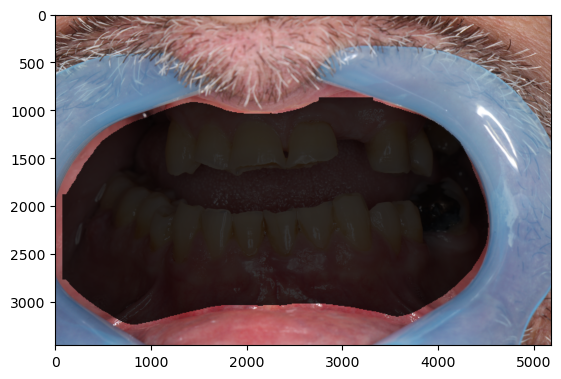

In [9]:
masks, result_img = showing_masking(front_sample, model_intraoral)

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# def overlay(image, mask, color=(0, 255, 0), alpha=0.3):
#     """Overlay mask on image with a given color and alpha transparency."""
#     overlay_image = image.copy()
#     overlay_image[mask == 1] = color
#     return cv2.addWeighted(overlay_image, alpha, image, 1 - alpha, 0)

# Load the model
model = model_intraoral

# Load the image
image_path = front_sample
img = cv2.imread(image_path)

# Make predictions
results = model(img)

# Extract masks
masks = results[0].masks.data.cpu().numpy()  # Extracting masks data as numpy array

# Overlay masks on the original image
image_with_masks = np.copy(img)
for mask in masks:
    mask_binary = (mask > 0.5).astype(np.uint8)  # Convert mask to binary
    image_with_masks = overlay(image_with_masks, mask_binary, color=(0, 255, 0), alpha=0.3)

# Display the image with masks
plt.imshow(cv2.cvtColor(image_with_masks, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Process each mask to crop the image
for i, mask in enumerate(masks):
    mask_binary = (mask > 0.5).astype(np.uint8) * 255  # Convert mask to binary

    # Find contours of the mask
    contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Find the largest contour
        largest_contour = max(contours, key=cv2.contourArea)

        # Get the bounding box coordinates of the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Crop the image using the bounding box
        cropped_object = img[y:y+h, x:x+w]

        # Save or display the cropped object
        cropped_image_path = f'/mnt/data/cropped_object_{i}.jpg'
        cv2.imwrite(cropped_image_path, cropped_object)

        # Optionally, display the cropped object
        plt.imshow(cv2.cvtColor(cropped_object, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Cropped Object {i}")
        plt.show()



0: 448x640 1 front, 231.2ms
Speed: 7.3ms preprocess, 231.2ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


MaskError: Mask and data not compatible: data size is 53747712, mask size is 860160.

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# def overlay(image, mask, color=(0, 255, 0), alpha=0.3):
#     """Overlay mask on image with a given color and alpha transparency."""
#     overlay_image = image.copy()
#     overlay_image[mask == 1] = color
#     return cv2.addWeighted(overlay_image, alpha, image, 1 - alpha, 0)

# Load the model
model = model_intraoral

# Load the image
image_path = front_sample
img = cv2.imread(image_path)

# Make predictions
results = model(img)

# Ensure the results contain masks
if not hasattr(results[0], 'masks'):
    raise ValueError("The model's results do not contain masks.")

# Extract masks
masks = results[0].masks.data.cpu().numpy()  # Extracting masks data as numpy array

# Verify mask dimensions match image dimensions
mask_height, mask_width = masks.shape[1:3]
image_height, image_width = img.shape[:2]

if (mask_height, mask_width) != (image_height, image_width):
    raise ValueError(f"Mask dimensions ({mask_height}, {mask_width}) do not match image dimensions ({image_height}, {image_width}).")

# Overlay masks on the original image
image_with_masks = np.copy(img)
for mask in masks:
    mask_binary = (mask > 0.5).astype(np.uint8)  # Convert mask to binary
    image_with_masks = overlay(image_with_masks, mask_binary, color=(0, 255, 0), alpha=0.3)

# Display the image with masks
plt.imshow(cv2.cvtColor(image_with_masks, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Process each mask to crop the image
for i, mask in enumerate(masks):
    mask_binary = (mask > 0.5).astype(np.uint8) * 255  # Convert mask to binary

    # Find contours of the mask
    contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Find the largest contour
        largest_contour = max(contours, key=cv2.contourArea)

        # Get the bounding box coordinates of the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Crop the image using the bounding box
        cropped_object = img[y:y+h, x:x+w]

        # Save or display the cropped object
        cropped_image_path = f'/mnt/data/cropped_object_{i}.jpg'
        cv2.imwrite(cropped_image_path, cropped_object)

        # Optionally, display the cropped object
        plt.imshow(cv2.cvtColor(cropped_object, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Cropped Object {i}")
        plt.show()



0: 448x640 1 front, 245.8ms
Speed: 4.6ms preprocess, 245.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


ValueError: Mask dimensions (448, 640) do not match image dimensions (3456, 5184).


0: 448x640 1 front, 222.9ms
Speed: 6.6ms preprocess, 222.9ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


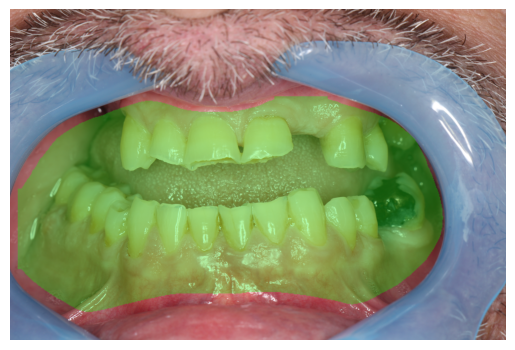

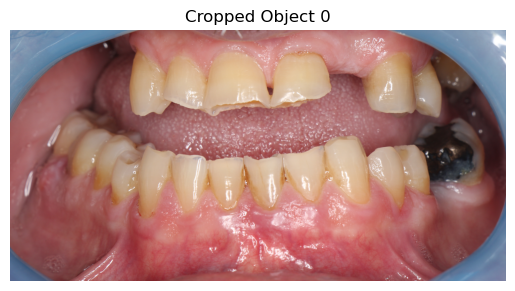

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

def overlay(image, mask, color=(0, 255, 0), alpha=0.3):
    """Overlay mask on image with a given color and alpha transparency."""
    overlay_image = image.copy()
    overlay_image[mask == 1] = color
    return cv2.addWeighted(overlay_image, alpha, image, 1 - alpha, 0)

# Load the model
model = model_intraoral

# Load the image
image_path = front_sample
img = cv2.imread(image_path)

# Make predictions
results = model(img)

# Ensure the results contain masks
if not hasattr(results[0], 'masks'):
    raise ValueError("The model's results do not contain masks.")

# Extract masks
masks = results[0].masks.data.cpu().numpy()  # Extracting masks data as numpy array

# Get the original image dimensions
image_height, image_width = img.shape[:2]

# Overlay masks on the original image
image_with_masks = np.copy(img)
for mask in masks:
    # Resize mask to match the original image dimensions
    mask_resized = cv2.resize(mask, (image_width, image_height), interpolation=cv2.INTER_NEAREST)
    mask_binary = (mask_resized > 0.5).astype(np.uint8)  # Convert mask to binary
    image_with_masks = overlay(image_with_masks, mask_binary, color=(0, 255, 0), alpha=0.3)

# Display the image with masks
plt.imshow(cv2.cvtColor(image_with_masks, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Process each mask to crop the image
for i, mask in enumerate(masks):
    # Resize mask to match the original image dimensions
    mask_resized = cv2.resize(mask, (image_width, image_height), interpolation=cv2.INTER_NEAREST)
    mask_binary = (mask_resized > 0.5).astype(np.uint8) * 255  # Convert mask to binary

    # Find contours of the mask
    contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Find the largest contour
        largest_contour = max(contours, key=cv2.contourArea)

        # Get the bounding box coordinates of the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Crop the image using the bounding box
        cropped_object = img[y:y+h, x:x+w]

        # Save or display the cropped object
        cropped_image_path = f'/mnt/data/cropped_object_{i}.jpg'
        cv2.imwrite(cropped_image_path, cropped_object)

        # Optionally, display the cropped object
        plt.imshow(cv2.cvtColor(cropped_object, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Cropped Object {i}")
        plt.show()



0: 448x640 1 front, 199.3ms
Speed: 3.5ms preprocess, 199.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


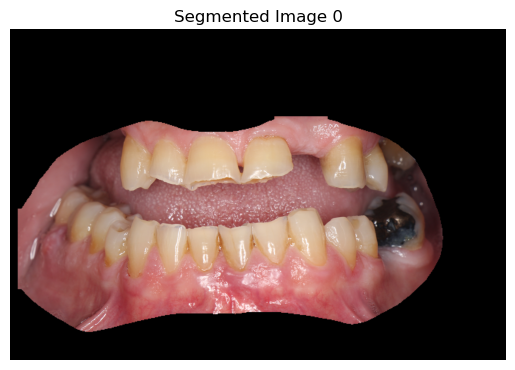

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

def overlay(image, mask, color=(0, 255, 0), alpha=0.3):
    """Overlay mask on image with a given color and alpha transparency."""
    overlay_image = image.copy()
    overlay_image[mask == 1] = color
    return cv2.addWeighted(overlay_image, alpha, image, 1 - alpha, 0)

# Load the model
model = model_intraoral

# Load the image
image_path = front_sample
img = cv2.imread(image_path)

# Make predictions
results = model(img)

# Ensure the results contain masks
if not hasattr(results[0], 'masks'):
    raise ValueError("The model's results do not contain masks.")

# Extract masks
masks = results[0].masks.data.cpu().numpy()  # Extracting masks data as numpy array

# Get the original image dimensions
image_height, image_width = img.shape[:2]

# Process each mask to create the final image with black outside the segmentation area
for i, mask in enumerate(masks):
    # Resize mask to match the original image dimensions
    mask_resized = cv2.resize(mask, (image_width, image_height), interpolation=cv2.INTER_NEAREST)
    mask_binary = (mask_resized > 0.5).astype(np.uint8)  # Convert mask to binary

    # Create a new image with the same dimensions as the original image
    segmented_image = np.zeros_like(img)

    # Use the mask to set the area inside the mask to the original image's colors
    segmented_image[mask_binary == 1] = img[mask_binary == 1]

    # Save or display the segmented image
    segmented_image_path = f'/mnt/data/segmented_image_{i}.jpg'
    cv2.imwrite(segmented_image_path, segmented_image)

    # Optionally, display the segmented image
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Segmented Image {i}")
    plt.show()


In [37]:
model_segment = YOLO('./models/last.pt')

In [38]:
# Load the image using OpenCV
img = cv2.imread(front_sample)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

In [39]:
def showing_masking(img):
    boxes, masks, cls, probs = predict_on_image(model_segment, img)

    # overlay masks on original image
    image_with_masks = np.copy(img)
    for mask_i in masks:
        image_with_masks = overlay(image_with_masks, mask_i, color=(0,255,0), alpha=0.3)

    return image_with_masks


0: 448x640 17 Tooths, 106.7ms
Speed: 3.9ms preprocess, 106.7ms inference, 10.1ms postprocess per image at shape (1, 3, 448, 640)
(17, 448, 640)
(3456, 5184, 17)


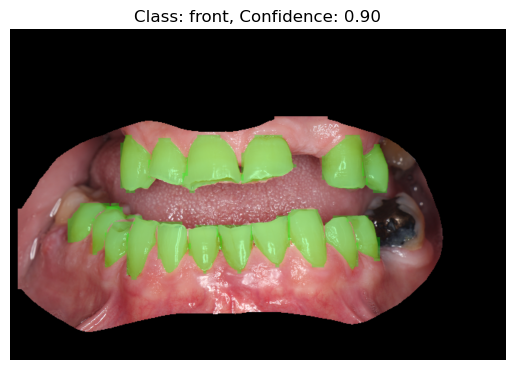

In [40]:
for idx, result in enumerate(results):
    boxes = result.boxes  # Extract bounding boxes
    for box_num, box in enumerate(boxes):
        # Get the coordinates of the bounding box
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        # Crop the bounding box from the image
        cropped_img = img_rgb[y1:y2, x1:x2]

        image_with_mask = showing_masking(segmented_image)

        # Display the cropped image using plt.imshow()
        plt.imshow(cv2.cvtColor(image_with_mask, cv2.COLOR_BGR2RGB))
        plt.title(f'Class: {result.names[int(box.cls[0])]}, Confidence: {box.conf[0]:.2f}')
        plt.axis('off')
        plt.show()


0: 608x640 1 upper, 329.7ms
Speed: 4.4ms preprocess, 329.7ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 640)


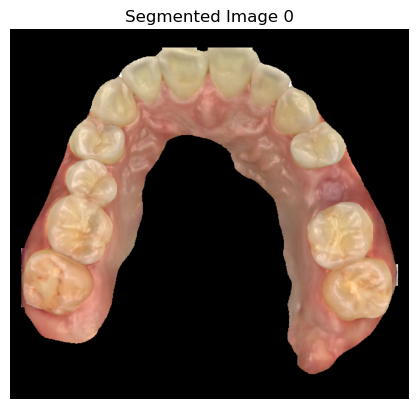

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

def overlay(image, mask, color=(0, 255, 0), alpha=0.3):
    """Overlay mask on image with a given color and alpha transparency."""
    overlay_image = image.copy()
    overlay_image[mask == 1] = color
    return cv2.addWeighted(overlay_image, alpha, image, 1 - alpha, 0)

# Load the model
model = model_intraoral

# Load the image
image_path = upper_sample
img = cv2.imread(image_path)

# Make predictions
results = model(img)

# Ensure the results contain masks
if not hasattr(results[0], 'masks'):
    raise ValueError("The model's results do not contain masks.")

# Extract masks
masks = results[0].masks.data.cpu().numpy()  # Extracting masks data as numpy array

# Get the original image dimensions
image_height, image_width = img.shape[:2]

# Process each mask to create the final image with black outside the segmentation area
for i, mask in enumerate(masks):
    # Resize mask to match the original image dimensions
    mask_resized = cv2.resize(mask, (image_width, image_height), interpolation=cv2.INTER_NEAREST)
    mask_binary = (mask_resized > 0.5).astype(np.uint8)  # Convert mask to binary

    # Create a new image with the same dimensions as the original image
    segmented_image = np.zeros_like(img)

    # Use the mask to set the area inside the mask to the original image's colors
    segmented_image[mask_binary == 1] = img[mask_binary == 1]

    # Save or display the segmented image
    segmented_image_path = f'/mnt/data/segmented_image_{i}.jpg'
    cv2.imwrite(segmented_image_path, segmented_image)

    # Optionally, display the segmented image
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Segmented Image {i}")
    plt.show()


0: 384x640 1 lower, 186.7ms
Speed: 2.7ms preprocess, 186.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


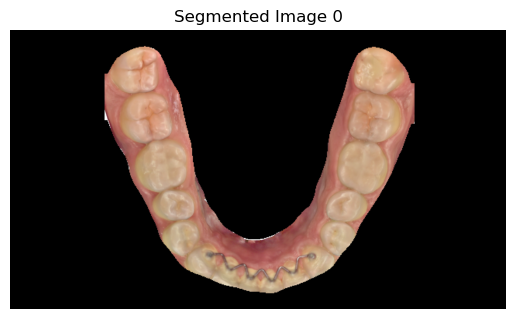

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

def overlay(image, mask, color=(0, 255, 0), alpha=0.3):
    """Overlay mask on image with a given color and alpha transparency."""
    overlay_image = image.copy()
    overlay_image[mask == 1] = color
    return cv2.addWeighted(overlay_image, alpha, image, 1 - alpha, 0)

# Load the model
model = model_intraoral

# Load the image
image_path = lower_sample
img = cv2.imread(image_path)

# Make predictions
results = model(img)

# Ensure the results contain masks
if not hasattr(results[0], 'masks'):
    raise ValueError("The model's results do not contain masks.")

# Extract masks
masks = results[0].masks.data.cpu().numpy()  # Extracting masks data as numpy array

# Get the original image dimensions
image_height, image_width = img.shape[:2]

# Process each mask to create the final image with black outside the segmentation area
for i, mask in enumerate(masks):
    # Resize mask to match the original image dimensions
    mask_resized = cv2.resize(mask, (image_width, image_height), interpolation=cv2.INTER_NEAREST)
    mask_binary = (mask_resized > 0.5).astype(np.uint8)  # Convert mask to binary

    # Create a new image with the same dimensions as the original image
    segmented_image = np.zeros_like(img)

    # Use the mask to set the area inside the mask to the original image's colors
    segmented_image[mask_binary == 1] = img[mask_binary == 1]

    # Save or display the segmented image
    segmented_image_path = f'/mnt/data/segmented_image_{i}.jpg'
    cv2.imwrite(segmented_image_path, segmented_image)

    # Optionally, display the segmented image
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Segmented Image {i}")
    plt.show()

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
# image_path = front_sample
image = result_img

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for the green color in HSV
lower_green = np.array([40, 70, 40])
upper_green = np.array([80, 255, 255])

# Create a binary mask where green colors are white and the rest are black
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours of the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the largest contour (assumed to be the desired green area)
largest_contour = max(contours, key=cv2.contourArea)
poly_mask = np.zeros_like(mask)
cv2.fillPoly(poly_mask, [largest_contour], 255)

# Apply the mask to the original image
cropped_image = cv2.bitwise_and(image, image, mask=poly_mask)

# Find the bounding box coordinates of the polygonal mask
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the image using the bounding box
cropped_object = cropped_image[y:y+h, x:x+w]

# Save the cropped image
cropped_image_path = '/mnt/data/cropped_object.jpg'
cv2.imwrite(cropped_image_path, cropped_object)

# Display the original image with the mask applied
plt.imshow(cv2.cvtColor(cropped_object, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Cropped Green Part")
plt.show()

# Display the cropped image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Original Image with Mask")
plt.show()


ValueError: max() arg is an empty sequence

In [8]:
print(masks)

[[[          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  ...
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]]]


In [29]:
import torch
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained YOLO model (you can also load your custom-trained model by specifying its path)
model = model_intraoral  # Change this to the path of your custom-trained model if needed

# Load the image
image_path = front_sample
image = cv2.imread(image_path)

# Convert BGR image (OpenCV format) to RGB (expected by YOLO model)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make predictions
results = model(image_rgb)

# Process and display results
for result in results:
    masks = result.masks  # Masks object for segmentation masks outputs (if model supports masks)

    if masks is not None:
        # Iterate over each mask
        for i, mask in enumerate(masks):
            # Convert the mask to binary
            mask_binary = mask.cpu().numpy().astype(np.uint8) * 255

            # Find contours of the binary mask
            contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            if len(contours) > 0:
                # Create a mask from the contours
                poly_mask = np.zeros_like(mask_binary)
                cv2.fillPoly(poly_mask, contours, 255)

                # Apply the polygonal mask to the original image
                cropped_image = cv2.bitwise_and(image, image, mask=poly_mask)

                # Find the bounding box coordinates of the polygonal mask
                x, y, w, h = cv2.boundingRect(contours[0])

                # Crop the image using the bounding box
                cropped_object = cropped_image[y:y+h, x:x+w]

                # Save or display the cropped object
                cropped_image_path = f'cropped_object_{i}.jpg'
                cv2.imwrite(cropped_image_path, cropped_object)

                # Optionally, display the cropped object
                plt.imshow(cv2.cvtColor(cropped_object, cv2.COLOR_BGR2RGB))
                plt.axis('off')
                plt.title(f"Cropped Object {i}")
                plt.show()

# Display the original image with segmentation masks
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


KeyboardInterrupt: 

In [22]:
def get_cropped(image_path, model):
    img =cv2.imread(image_path)
    boxes, masks, cls, probs = predict_on_image(model, img)

    # overlay masks on original image
    image_with_masks = np.copy(img)

    # Find the contours of the segmented area
    contours, _ = cv2.findContours(masks, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the bounding box coordinates
    x, y, w, h = cv2.boundingRect(contours[0])

    # Crop the original image using the bounding box coordinates
    cropped_image = image[y:y+h, x:x+w]

    return cropped_image

In [23]:
cropped_img = get_cropped(front_sample, model_intraoral)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.show()


0: 448x640 1 front, 234.8ms
Speed: 4.4ms preprocess, 234.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
(1, 448, 640)
(3456, 5184, 1)


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/core/src/copy.cpp:1026: error: (-215:Assertion failed) top >= 0 && bottom >= 0 && left >= 0 && right >= 0 && _src.dims() <= 2 in function 'copyMakeBorder'


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image = cv2.imread('path_to_your_image.jpg')

# Load the segmentation mask
mask = cv2.imread('path_to_your_mask.png', cv2.IMREAD_GRAYSCALE)

# Find the contours of the segmented area
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the bounding box coordinates
x, y, w, h = cv2.boundingRect(contours[0])

# Crop the original image using the bounding box coordinates
cropped_image = image[y:y+h, x:x+w]


In [13]:
model_singletooth = YOLO('./models/singletooth_segement/best.pt')

In [14]:
results = model_singletooth.predict(source=lower_sample, conf=0.25)


image 1/1 /Users/khawaritzmi/GAIA_partime/Dental/programs/dental-mate/src/tooth-numbering/sample_images/lower_perfect1.jpg: 384x640 16 tooths, 224.0ms
Speed: 5.9ms preprocess, 224.0ms inference, 18.4ms postprocess per image at shape (1, 3, 384, 640)


In [15]:
img = cv2.imread(lower_sample)


0: 448x640 20 tooths, 178.2ms
Speed: 2.0ms preprocess, 178.2ms inference, 12.1ms postprocess per image at shape (1, 3, 448, 640)
(20, 448, 640)
(3456, 5184, 20)


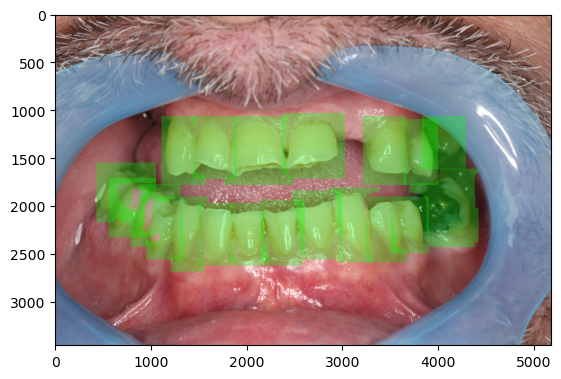

In [18]:
showing_masking(front_sample, model_singletooth)